In [2]:
import pickle
#%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot_methods
import networkx as nx
import glob
from matplotlib.colors import LogNorm
import pandas
import json
import sklearn
import sklearn.metrics
import bz2

import sys
sys.path += ["../mlpf/plotting/"]

import plot_utils

In [3]:
!mkdir -p plots

In [260]:
data = pickle.load(bz2.BZ2File("out/pythia8_ttbar/tev14_pythia8_ttbar_0_0.pkl.bz2", "rb"))

In [261]:
ycand = np.vstack(data["ycand"])
ygen = np.vstack(data["ygen"])
X = np.vstack(data["X"])

msk1 = (ygen[:, 0]==1) & (ycand[:, 0]==1) & (ycand[:, 2]>0)
msk2 = (ygen[:, 0]==1) & (ycand[:, 0]==1) & (ycand[:, 2]==0)

np.round(X[msk1][:10, :4], 4)

array([[ 2.    ,  1.1035,  1.2758,  0.5428],
       [ 2.    ,  0.7896,  0.294 ,  0.9186],
       [ 2.    ,  0.9743,  2.0971, -0.5629],
       [ 2.    ,  0.9328, -1.0436, -0.6695],
       [ 2.    ,  1.1007,  1.2506,  0.0811],
       [ 2.    ,  1.014 ,  1.4419, -0.2267],
       [ 2.    ,  0.8165, -1.7251, -0.4383],
       [ 2.    ,  0.5012,  1.7881,  0.1877],
       [ 2.    ,  0.9396,  2.199 , -0.5749],
       [ 2.    ,  0.2617,  1.5535,  0.1014]])

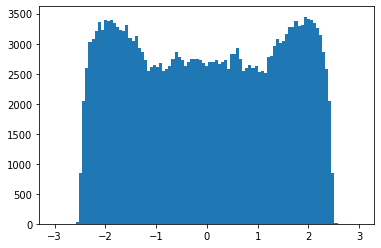

In [262]:
plt.hist(ygen[msk1, 3], bins=np.linspace(-3, 3,100));

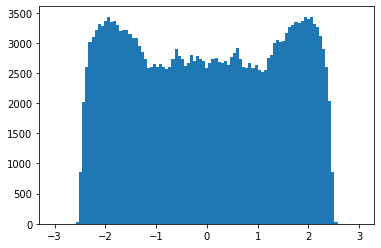

In [263]:
plt.hist(ycand[msk1, 3], bins=np.linspace(-3, 3,100));

In [264]:
np.round(ygen[msk1, 2:6], 4)

array([[ 1.1732,  1.2755,  0.5482, -0.8363],
       [ 0.78  ,  0.2885,  0.9154, -0.4025],
       [ 1.4072,  2.1107, -0.5621,  0.8271],
       ...,
       [ 0.4542, -0.0065,  0.1265,  0.992 ],
       [ 0.548 ,  1.2687, -0.6544, -0.7561],
       [ 1.1279, -2.1621,  0.2639,  0.9646]])

In [265]:
np.round(ycand[msk1, 2:6], 4)

array([[ 1.078 ,  1.2758,  0.5428, -0.8399],
       [ 0.7888,  0.294 ,  0.9186, -0.3952],
       [ 0.9987,  2.0971, -0.5629,  0.8265],
       ...,
       [ 0.4681,  0.0032,  0.1224,  0.9925],
       [ 0.5512,  1.2801, -0.6504, -0.7596],
       [ 1.2659, -2.1662,  0.2542,  0.9672]])

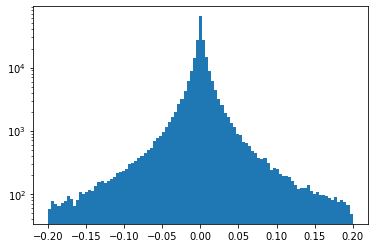

In [274]:
vt = X[msk1, 2]
vc = ycand[msk1, 4]
vg = ygen[msk1, 4]

plt.hist((vg - vc)/vg, bins=np.linspace(-0.2, 0.2, 100));
plt.yscale("log")

(-0.2, 0.2)

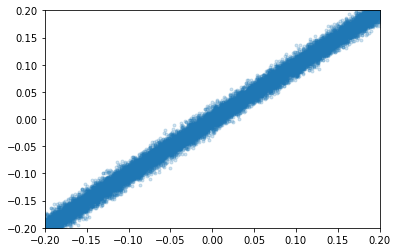

In [271]:
plt.scatter(vg, vt, marker=".", alpha=0.2)
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)

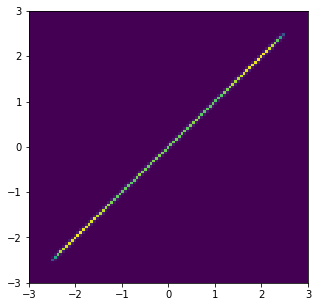

In [267]:
plt.figure(figsize=(5,5))
plt.hist2d(vg, vt, bins=(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100)));

In [268]:
data = pickle.load(bz2.BZ2File("out/pythia8_ttbar/tev14_pythia8_ttbar_9_0.pkl.bz2", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'out/pythia8_ttbar/tev14_pythia8_ttbar_9_0.pkl.bz2'

In [ ]:
X = data["X"][0]
ycand = data["ycand"][0]
ygen = data["ygen"][0]

In [ ]:
msk_trk = X[:, 0] == 2
msk_ecal = (X[:, 0] == 1) & (X[:, 6] > 0)
msk_hcal = (X[:, 0] == 1) & (X[:, 7] > 0)

In [ ]:
arr_trk = pandas.DataFrame(X[msk_trk], columns=["id", "pt", "eta", "sphi", "cphi", "p", "eta_outer", "sphi_outer", "cphi_outer", "charge", "is_gen_muon", "is_gen_ele"])
arr_ecal = pandas.DataFrame(X[msk_ecal][:, :6], columns=["id", "et", "eta", "sphi", "cphi", "e"])
arr_hcal = pandas.DataFrame(X[msk_hcal][:, :6], columns=["id", "et", "eta", "sphi", "cphi", "e"])

arr_gen = pandas.DataFrame(ygen[ygen[:, 0]!=0], columns=["id", "charge", "pt", "eta", "sphi", "cphi", "energy"])

In [ ]:
points_a = arr_trk["eta"].values, np.arctan2(arr_trk["sphi"], arr_trk["cphi"]).values
points_b = arr_trk["eta_outer"].values, np.arctan2(arr_trk["sphi_outer"], arr_trk["cphi_outer"]).values

In [ ]:
r1 = 0.5
r2 = 1.0
r3 = 1.2
r4 = 1.4
r5 = 1.6

points = []
for i in range(len(arr_trk)):
    point = []
    point.append((0,0,0))
    point.append((points_a[0][i], r1*np.sin(points_a[1][i]), r1*np.cos(points_a[1][i])))
    point.append((points_b[0][i], r2*np.sin(points_b[1][i]), r2*np.cos(points_b[1][i])))
    points.append(point)

In [ ]:
import mpl_toolkits

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

lc = mpl_toolkits.mplot3d.art3d.Line3DCollection(points, linewidths=0.2, color="gray", alpha=0.5, label="tracks")
ax.add_collection(lc)

#ax.scatter(points_a[0], r1*np.sin(points_a[1]), r1*np.cos(points_a[1]), color="gray", s=1.0)
#ax.scatter(points_b[0], r2*np.sin(points_b[1]), r2*np.cos(points_b[1]), color="gray", s=1.0)
# for i in range(len(arr_trk)):
#     #print(points[i:i+3, 0])
#     kwargs
#     ax.plot(points[i:i+3, 0], points[i:i+3, 1], points[i:i+3, 2], marker=".", color="gray", alpha=0.05)
    
ax.scatter(arr_ecal["eta"], r3*arr_ecal["sphi"], r3*arr_ecal["cphi"], s=0.1*arr_ecal["e"], marker="s", alpha=0.5, label="ECAL clusters")
ax.scatter(arr_hcal["eta"], r4*arr_hcal["sphi"], r4*arr_hcal["cphi"], s=0.1*arr_hcal["e"], marker="s", alpha=0.5, label="HCAL clusters")
ax.scatter(arr_gen["eta"], r5*arr_gen["sphi"], r5*arr_gen["cphi"], alpha=0.2, marker="x", color="red", label="generator particles")

ax.set_zlabel("y (a.u.)")
ax.set_ylabel("x (a.u.)")
ax.set_xlabel("$\eta$")
plt.legend(frameon=False)
plt.title("Simulated event with PU200")
plt.savefig("plots/event.pdf", bbox_inches="tight")

In [ ]:
fi = np.load("experiments/delphes-gnn-skipconn-83d11bb0/pred.npz")
ygen = fi["ygen"]
ycand = fi["ycand"]
ypred = fi["ypred"]
X = fi["X"]

ygen = ygen.reshape((ygen.shape[0]*ygen.shape[1], ygen.shape[2]))
ycand = ycand.reshape((ycand.shape[0]*ycand.shape[1], ycand.shape[2]))
ypred = ypred.reshape((ypred.shape[0]*ypred.shape[1], ypred.shape[2]))
X = X.reshape((X.shape[0]*X.shape[1], X.shape[2]))

In [ ]:
plt.figure(figsize=(5,5))

pid = 1

x1 = np.sum(fi["ygen"][:, :, 0]!=0, axis=1)
x2 = np.sum(fi["ypred"][:, :, 0]!=0, axis=1)
x3 = np.sum(fi["ycand"][:, :, 0]!=0, axis=1)

v0 = np.min([np.min(x1), np.min(x2), np.min(x3)])
v1 = np.max([np.max(x1), np.max(x2), np.max(x3)])

plt.scatter(
    x1,
    x3,
    marker=".",
    label="DelphesPF",
    alpha=0.2
)

plt.scatter(
    x1,
    x2,
    marker=".",
    label="MLPF",
    alpha=0.2
)
plt.legend(loc="best", frameon=False)
plt.plot([v0, v1], [v0, v1], color="black", ls="--")

plt.xlabel("Number of generated particles per event")
plt.ylabel("Number of reconstructed particles per event")
plt.title("Particle multiplicity reconstruction, all PIDs")
plt.savefig("plots/num_particles.pdf", bbox_inches="tight")

In [ ]:
print(ygen.shape)
print(ycand.shape)
print(ypred.shape)

In [ ]:
pid = 1
var = 2
bins = np.linspace(0, 5, 100)

msk = (ygen[:, 0] == pid)
plt.hist(ygen[msk, var], bins=bins, histtype="step", label="gen");

msk = ypred[:, 0] == pid
plt.hist(ypred[msk, var], bins=bins, histtype="step", label="MLPF");

msk = ycand[:, 0] == pid
plt.hist(ycand[msk, var], bins=bins, histtype="step", label="DelphesPF");

#plt.yscale("log")
plt.legend(frameon=False, loc="best")

In [ ]:
pid = 2
var = 3
bins = np.linspace(-6, 6, 100)

msk = (ygen[:, 0] == pid)
plt.hist(ygen[msk, var], bins=bins, histtype="step", label="gen");

msk = ypred[:, 0] == pid
plt.hist(ypred[msk, var], bins=bins, histtype="step", label="MLPF");

msk = ycand[:, 0] == pid
plt.hist(ycand[msk, var], bins=bins, histtype="step", label="DelphesPF");

plt.legend(frameon=False, loc="best")
#plt.ylim(0,25000)

In [ ]:
ranges = {
    "pt": np.linspace(0, 10, 61),
    "eta": np.linspace(-5, 5, 61),
    "sphi": np.linspace(-1, 1, 61),
    "cphi": np.linspace(-1, 1, 61),
    "energy": np.linspace(0, 100, 61)
}

pid_names = {
    1: "charged hadrons",
    2: "neutral hadrons",
    3: "photons",
    4: "electrons",
    5: "muons",
}
var_names = {
    "pt": "pT [GeV]",
    "eta": r"$\eta$",
    "sphi": r"$\mathrm{sin} \phi$",
    "cphi": r"$\mathrm{cos} \phi$",
    "energy": "E [GeV]"
}

var_names_nounit = {
    "pt": "pT",
    "eta": r"$\eta$",
    "sphi": r"$\mathrm{sin} \phi$",
    "cphi": r"$\mathrm{cos} \phi$",
    "energy": "E"
}

var_indices = {
    "pt": 2,
    "eta": 3,
    "sphi": 4,
    "cphi": 5,
    "energy": 6
}

In [ ]:
def plot_num_particles_pid(pid):
    plt.figure(figsize=(5,5))

    x1 = np.sum(fi["ygen"][:, :, 0]==pid, axis=1)
    x2 = np.sum(fi["ypred"][:, :, 0]==pid, axis=1)
    x3 = np.sum(fi["ycand"][:, :, 0]==pid, axis=1)

    v0 = np.min([np.min(x1), np.min(x2), np.min(x3)])
    v1 = np.max([np.max(x1), np.max(x2), np.max(x3)])

    plt.scatter(
        x1,
        x3,
        marker=".",
        label="DelphesPF (C={:.4f})".format(np.corrcoef(x1, x3)[0,1]),
        alpha=0.1
    )

    plt.scatter(
        x1,
        x2,
        marker=".",
        label="MLPF (C={:.4f})".format(np.corrcoef(x1, x2)[0,1]),
        alpha=0.1
    )
    plt.legend(loc="best", frameon=False)
    plt.plot([v0, v1], [v0, v1], color="black", ls="--")
    
    plt.xlabel("Number of generated particles per event")
    plt.ylabel("Number of reconstructed particles per event")
    plt.title("Particle multiplicity, {}".format(pid_names[pid]))
    plt.savefig("plots/num_particles_pid{}.pdf".format(pid), bbox_inches="tight")
    
plot_num_particles_pid(1)
plot_num_particles_pid(2)

In [ ]:
# for pid in [1,2,3,4,5]:
#     for var in ["pt", "eta", "sphi", "cphi", "energy"]:
#         rng = ranges[var]

#         msk = (ygen[:, 0]==pid) & (ypred[:, 0]==pid) & (ycand[:, 0]==pid)

#         plt.figure(figsize=(6,5))
#         plt.title(pid_names[pid])
#         plt.hist2d(
#             ygen[msk, var_indices[var]],
#             ypred[msk, var_indices[var]],
#             bins=(rng, rng),
#             cmap="Blues",
#             norm=matplotlib.colors.LogNorm()
#         )
#         plt.colorbar()
#         plt.xlabel("Gen {}".format(var_names[var]))
#         plt.ylabel("MLPF {}".format(var_names[var]))
#         plt.savefig("plots/corr_mlpf_pid{}_{}.pdf".format(pid, var), bbox_inches="tight")

#         plt.figure(figsize=(6,5))
#         plt.title(pid_names[pid])
#         plt.hist2d(
#             ygen[msk, var_indices[var]],
#             ycand[msk, var_indices[var]],
#             bins=(rng, rng),
#             cmap="Blues",
#             norm=matplotlib.colors.LogNorm()
#         );
#         plt.xlabel("Gen {}".format(var_names[var]))
#         plt.ylabel("DelphesPF {}".format(var_names[var]))
#         plt.colorbar()
#         plt.savefig("plots/corr_delphespf_pid{}_{}.pdf".format(pid, var), bbox_inches="tight")


In [ ]:
def plot_reso(pid, var, rng):
    var_idx = var_indices[var]
    msk = (ygen[:, 0]==pid) & (ypred[:, 0]==pid) & (ycand[:, 0]==pid)
    bins = np.linspace(-rng, rng, 100)
    yg = ygen[msk, var_idx]
    yp = ypred[msk, var_idx]
    yc = ycand[msk, var_idx]
    ratio_mlpf = (yp - yg) / yg
    ratio_dpf = (yc - yg) / yg
    ratio_mlpf[yg==0] = -1
    ratio_dpf[yg==0] = -1

    plt.figure(figsize=(4, 4))
    ax = plt.axes()
    plt.title("{} resolution for {}".format(var_names_nounit[var], pid_names[pid]))
    plt.hist(ratio_dpf, bins=bins, histtype="step", lw=2, label="DelphesPF\n$\mu={:.1f},\\ \sigma={:.1f}$".format(np.mean(ratio_dpf), np.std(ratio_dpf)));
    plt.hist(ratio_mlpf, bins=bins, histtype="step", lw=2, label="MLPF\n$\mu={:.1f},\\ \sigma={:.1f}$".format(np.mean(ratio_mlpf), np.std(ratio_mlpf)));
    plt.legend(frameon=False)
    plt.xlabel("{} resolution, $(y_p - y_g)/y_g$".format(var_names_nounit[var]))
    plt.ylabel("number of particles")
    #plt.ylim(0, ax.get_ylim()[1]*2)
    plt.ylim(1, 1e10)
    plt.yscale("log")
    plt.savefig("plots/res_pid{}_{}.pdf".format(pid, var), bbox_inches="tight")

In [ ]:
def midpoints(x):
    return x[:-1] + np.diff(x)/2

In [ ]:
def mask_empty(hist):
    h0 = hist[0].astype(np.float64)
    h0[h0<50] = 0
    return (h0, hist[1])

In [ ]:
def divide_zero(a, b):
    a = a.astype(np.float64)
    b = b.astype(np.float64)
    out = np.zeros_like(a)
    np.divide(a, b, where=b>0, out=out)
    return out

In [ ]:
def draw_efficiency_fakerate(pid, var, bins):
    var_idx = var_indices[var]

    msk_gen = ygen[:, 0]==pid
    msk_pred = ypred[:, 0]==pid
    msk_cand = ycand[:, 0]==pid

    hist_gen = np.histogram(ygen[msk_gen, var_idx], bins=bins);
    hist_cand = np.histogram(ygen[msk_gen & msk_cand, var_idx], bins=bins);
    hist_pred = np.histogram(ygen[msk_gen & msk_pred, var_idx], bins=bins);
    
    hist_gen = mask_empty(hist_gen)
    hist_cand = mask_empty(hist_cand)
    hist_pred = mask_empty(hist_pred)

    plt.figure(figsize=(4,4))
    plt.hist(ygen[msk_gen&msk_pred&msk_cand, var_idx], bins=bins, label="Gen", histtype="step")
    plt.hist(ypred[msk_gen&msk_pred&msk_cand, var_idx], bins=bins, label="MLPF", histtype="step")
    plt.hist(ycand[msk_gen&msk_pred&msk_cand,var_idx], bins=bins, label="Delphes-PF", histtype="step")
    plt.legend(frameon=True, loc=0)
    #plt.ylim(0,1)
    plt.xlabel(var_names[var])
    plt.savefig("plots/distribution_pid{}_{}.pdf".format(pid, var), bbox_inches="tight")

    #efficiency plot
    plt.figure(figsize=(4,4))
    plt.title("reco efficiency for {}".format(pid_names[pid]))
    plt.errorbar(
        midpoints(hist_gen[1]),
        divide_zero(hist_cand[0], hist_gen[0]),
        divide_zero(np.sqrt(hist_gen[0]), hist_gen[0]) * divide_zero(hist_cand[0], hist_gen[0]),
        lw=0, label="Delphes-PF", elinewidth=1, marker=".")
    plt.errorbar(
        midpoints(hist_gen[1]),
        divide_zero(hist_pred[0], hist_gen[0]),
        divide_zero(np.sqrt(hist_gen[0]), hist_gen[0]) * divide_zero(hist_pred[0], hist_gen[0]),
        lw=0, label="MLPF", elinewidth=1, marker=".")
    plt.legend(frameon=True, loc=0)
    plt.ylim(0,1.2)
    plt.xlabel(var_names[var])
    plt.ylabel("efficiency")
    plt.savefig("plots/eff_pid{}_{}.pdf".format(pid, var), bbox_inches="tight")

    hist_cand2 = np.histogram(ygen[msk_cand & (ygen[:, 0]!=0), var_idx], bins=bins);
    hist_pred2 = np.histogram(ygen[msk_pred & (ygen[:, 0]!=0), var_idx], bins=bins);
    hist_cand_gen2 = np.histogram(ygen[msk_cand & ~msk_gen & (ygen[:, 0]!=0), var_idx], bins=bins);
    hist_pred_gen2 = np.histogram(ygen[msk_pred & ~msk_gen & (ygen[:, 0]!=0), var_idx], bins=bins);

    hist_cand2 = mask_empty(hist_cand2)
    hist_cand_gen2 = mask_empty(hist_cand_gen2)
    hist_pred2 = mask_empty(hist_pred2)
    hist_pred_gen2 = mask_empty(hist_pred_gen2)
    
    #fake rate plot
    plt.figure(figsize=(4,4))
    plt.title("reco fake rate for {}".format(pid_names[pid]))
    plt.errorbar(
        midpoints(hist_cand2[1]),
        divide_zero(hist_cand_gen2[0], hist_cand2[0]),
        divide_zero(np.sqrt(hist_cand_gen2[0]), hist_cand2[0]),
        lw=0, label="Delphes-PF", elinewidth=1, marker=".")
    plt.errorbar(
        midpoints(hist_pred2[1]),
        divide_zero(hist_pred_gen2[0], hist_pred2[0]),
        divide_zero(np.sqrt(hist_pred_gen2[0]), hist_pred2[0]),
        lw=0, label="MLPF", elinewidth=1, marker=".")
    plt.legend(frameon=True, loc=0)
    plt.ylim(0, 1.0)
    #plt.yscale("log")
    plt.xlabel(var_names[var])
    plt.ylabel("fake rate")
    plt.savefig("plots/fakerate_pid{}_{}.pdf".format(pid, var), bbox_inches="tight")


In [ ]:
draw_efficiency_fakerate(1, "pt", np.linspace(0, 3, 61));

In [ ]:
draw_efficiency_fakerate(1, "eta", np.linspace(-3, 3, 61))

In [ ]:
draw_efficiency_fakerate(2, "energy", np.linspace(5, 55, 61))

In [ ]:
draw_efficiency_fakerate(2, "eta", np.linspace(-6, 6, 61))

In [ ]:
plot_reso(1, "pt", 2)
plot_reso(1, "eta", 0.2)
plot_reso(1, "sphi", 0.1)
plot_reso(1, "cphi", 0.1)

In [ ]:
plot_reso(2, "energy", 5)
plot_reso(2, "eta", 0.5)
plot_reso(2, "sphi", 0.5)
plot_reso(2, "cphi", 0.5)

In [ ]:
plot_reso(3, "energy", 2)
plot_reso(3, "eta", 0.5)
plot_reso(3, "sphi", 0.5)
plot_reso(3, "cphi", 0.5)

In [ ]:
plot_reso(4, "pt", 2)
plot_reso(4, "eta", 0.5)
plot_reso(4, "sphi", 0.5)
plot_reso(4, "cphi", 0.5)

In [ ]:
plot_reso(5, "pt", 2)
plot_reso(5, "eta", 0.5)
plot_reso(5, "sphi", 0.5)
plot_reso(5, "cphi", 0.5)

In [ ]:
confusion = sklearn.metrics.confusion_matrix(
    ygen[:, 0], ycand[:, 0], normalize="true"
)

confusion2 = sklearn.metrics.confusion_matrix(
    ygen[:, 0], ypred[:, 0], normalize="true"
)

In [ ]:
np.round(confusion, 2)

In [ ]:
np.round(confusion2, 2)

In [ ]:
sklearn.metrics.accuracy_score(ygen[:, 0], ycand[:, 0])

In [ ]:
sklearn.metrics.accuracy_score(ygen[:, 0], ypred[:, 0])

In [ ]:
plot_utils.plot_confusion_matrix(confusion, ["none", "ch.had", "n.had", "g", "el", "mu"])
plt.title("Normalized per-particle confusion matrix: DelphesPF")
plt.ylabel("Generator PID")
plt.xlabel("Reconstructed PID")
plt.savefig("plots/confusion_normed_delphespf.pdf", bbox_inches="tight")

In [ ]:
plot_utils.plot_confusion_matrix(confusion2, ["none", "ch.had", "n.had", "g", "el", "mu"])
plt.title("Normalized per-particle confusion matrix: MLPF")
plt.ylabel("Generator PID")
plt.xlabel("Reconstructed PID")
plt.savefig("plots/confusion_normed_mlpf.pdf", bbox_inches="tight")

## Scaling of the model inference time with synthetic data

```bash
singularity exec --nv ~/HEP-KBFI/singularity/base.simg python3 ../mlpf/tensorflow/delphes_model.py --action timing --weights experiments/delphes-gnn-skipconn-0cece961/weights.100-0.172538.hdf5
```

In [ ]:
timing_data_d = json.load(open("experiments/delphes-gnn-skipconn-0cece961/synthetic_timing.json", "r"))
timing_data_d = sum(timing_data_d, [])

In [ ]:
timing_data = pandas.DataFrame.from_records(timing_data_d)

In [ ]:
lines = timing_data[timing_data["batch_size"] == 1]
times_b1 = lines.groupby("event_size").apply(lambda x: np.mean(x["time_per_event"]))


lines = timing_data[timing_data["event_size"] == 5120]
times_ev5120 = lines.groupby("batch_size").apply(lambda x: np.mean(x["time_per_event"]))

lines = timing_data[timing_data["event_size"] == 2560]
times_ev2560 = lines.groupby("batch_size").apply(lambda x: np.mean(x["time_per_event"]))

lines = timing_data[timing_data["event_size"] == 1280]
times_ev1280 = lines.groupby("batch_size").apply(lambda x: np.mean(x["time_per_event"]))

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(times_b1.keys(), times_b1.values, marker="o", label="MLPF GNN")
plt.axvline(128*40, color="black", ymin=0, ymax=0.1, lw=1)
plt.xticks([128*10, 128*20, 128*40, 128*80, 128*160])
plt.text(5300, 5, r"$t\bar{t}$ PU200 (avg.)")
plt.ylim(0,175)
#plt.xlim(0,25000)
plt.xlabel("Average event size\n(number of tracks, clusters per event)")
plt.ylabel("Average per-event runtime [ms]")
plt.legend(loc="best", frameon=False)
#plt.title("MLPF model inference time")
#plt.xscale("log")
plt.savefig("plots/inference_time.pdf", bbox_inches="tight")

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(times_ev1280.keys(), times_ev1280.values / times_ev1280.values[0], marker="o", label="PU50")
plt.plot(times_ev2560.keys(), times_ev2560.values / times_ev2560.values[0], marker="o", label="PU100")
plt.plot(times_ev5120.keys(), times_ev5120.values / times_ev5120.values[0], marker="o", label="PU200")
plt.xticks([1, 2, 4])
plt.xlabel("Batch size in inference\n(number of events)")
plt.ylabel("Reduction in inference time")
plt.legend(loc="best", frameon=False)
#plt.title("MLPF model inference time")
plt.savefig("plots/inference_time_batch.pdf", bbox_inches="tight")

In [ ]:
ygen = fi["ygen"]
ycand = fi["ycand"]
ypred = fi["ypred"]
ypred_raw = fi["ypred_raw"]

X = fi["X"]

In [ ]:
import scipy
ypred_sm = scipy.special.softmax(ypred_raw, axis=-1)

In [ ]:
pid = 1
preds = ypred_sm[:, :, pid].flatten()
msk_true = (ygen[:, :, 0] == pid).flatten()
msk_cand = (ycand[:, :, 0] == pid).flatten()

tpr_delphes = np.sum((msk_cand==True) & (msk_true==True)) /  np.sum(msk_true==True)
fpr_delphes = np.sum((msk_cand==True) & (msk_true==False)) /  np.sum(msk_cand==True)

In [ ]:
plt.figure(figsize=(4,4))
fpr, tpr, thresh = sklearn.metrics.roc_curve(msk_true, preds)
plt.plot(fpr_delphes, tpr_delphes, marker="^", label="DelphesPF", lw=0)
plt.plot(fpr, tpr, label="MLPF")
plt.xlim(0.0, 0.25)
plt.ylim(0.8,1.0)
plt.xlabel("fake rate")
plt.ylabel("efficiency")
plt.title("Classifier output for {}".format(pid_names[pid]))
plt.legend(loc="best")

print(np.round(thresh[np.searchsorted(fpr, fpr_delphes)], 3))